<a href="https://colab.research.google.com/github/khairulomar/Melbourne_pedestrian/blob/master/Gridplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Function to automate CBD roads

def fill_roads(array, horiz=1, fixed=0, start=0, stop=0):
  if horiz == 1:
    for col in range(start, stop+1):
      array[fixed][col] = 1
  else:
    for row in range(start, stop+1):
      array[row][fixed] = 1
  return array


In [0]:
# Create data for CBD roads

import numpy as np

# Blank grid data
base_data = np.empty((37, 69))
base_data[:] = np.nan

# South-to-North roads
horiz_roads = [[1,  2,  0, 68], # format: horiz=1, row, start_col, end_col
               [1, 10,  0, 68],
               [1, 18,  2, 66],
               [1, 22, 43, 65],
               [1, 26,  0, 68],
               [1, 34,  0, 68]]
for road in horiz_roads:
  fill_roads(base_data, *road)

# West-to-East roads
vert_roads  = [[0,  2,  0, 36], # format: horiz=0, col, start_row, end_col
               [0, 10,  0, 36],
               [0, 18,  0, 36],
               [0, 26,  2, 36],
               [0, 34,  2, 36],
               [0, 42,  0, 36],
               [0, 50,  0, 36],
               [0, 58,  0, 36],
               [0, 66,  2, 36]]
for road in vert_roads:
  fill_roads(base_data, *road)

In [0]:
# Label roads on map
road_labels = [[14,  2, 0,  'Flinders Street'], # format: x, y, rotation, name
               [14, 10, 0,  'Collins Street'],
               [14, 18, 0,  'Bourke Street'],
               [14, 26, 0,  'Lonsdale Street'],
               [14, 34, 0,  'La Trobe Street'],
               [54,  2, 0,  'Flinders Street'],
               [54, 10, 0,  'Collins Street'],
               [54, 18, 0,  'Bourke Street'],
               [54, 22, 0,  'Chinatown'],
               [54, 26, 0,  'Lonsdale Street'],
               [54, 34, 0,  'La Trobe Street'],
               [ 2, 18, 90, 'Spencer Street'],
               [10, 18, 90, 'King Street'],
               [18, 18, 90, 'William Street'],
               [26, 18, 90, 'Queen Street'],
               [34, 18, 90, 'Elizabeth Street'],
               [42, 18, 90, 'Swanston Street'],
               [50, 18, 90, 'Russell Street'],
               [58, 18, 90, 'Exhibition Street'],
               [66, 18, 90, 'Spring Street'],]

# Label buildings on map
area_labels = [[ 0, 17, 90, 'Southern Cross Station'],
               [35,  0,  0, 'Flinders Street Station'],
               [36, 21,  0, 'Myers'],
               [38, 16,  0, 'Bourke St Mall'],
               [38, 24,  0, 'Emporium'],
               [38, 30,  0, 'Melbourne\nCentral'],
               [39, 21,  0, 'David\nJones'],
               [45,  4,  0, "St Paul's"],
               [45,  8,  0, 'City Square'],
               [45, 12,  0, 'Town Hall'],
               [46,  0,  0, 'Federation Sq'],
               [46, 20,  0, 'Target Centre'],
               [46, 28,  0, 'QV'],
               [46, 31,  0, 'State\nLibrary'],
               [46, 36,  0, 'RMIT Univ'],
               [48, 14,  0, 'QT'],
               [56, 12,  0, 'Nauru\nHouse'],
               [63, 20,  0, 'Princess\nTheatre'],
               [68, 18, 90, 'Parliament']]

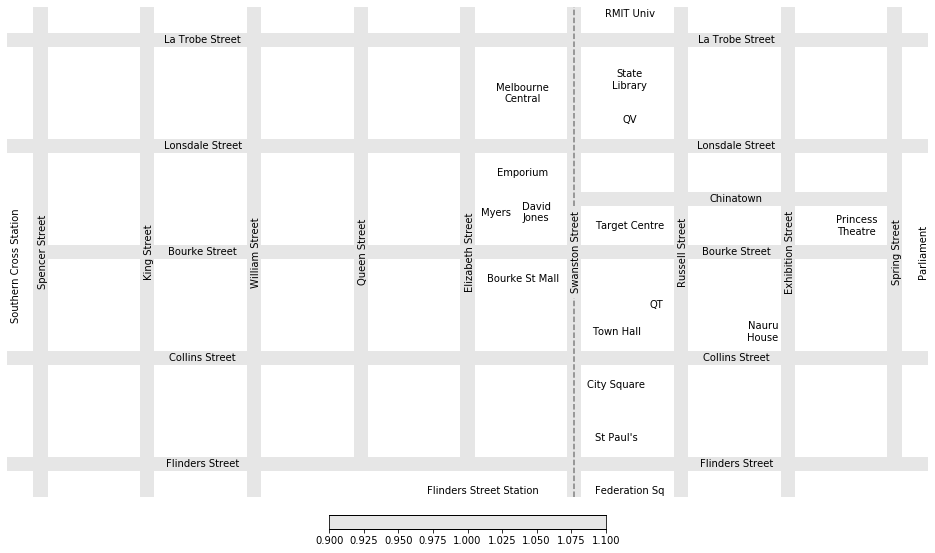

In [0]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

fig, ax = plt.subplots(figsize=(16.5,11))

# Plot base map
road_colors = LinearSegmentedColormap.from_list('road_colors',
                                                ['#e6e6e6','#e6e6e6'], N=1)
base_map = ax.pcolor(base_data, cmap=road_colors)
for label in road_labels + area_labels:
  plt.text(label[0]+0.65, label[1]+0.5, label[3], rotation=label[2],
           ha='center', va='center', fontsize=10)

plt.vlines(42.5,0,15,linestyles='dashed',color='grey')
plt.vlines(42.5,22,37,linestyles='dashed',color='grey')

# Legend
fig.colorbar(base_map, orientation='horizontal', pad=0.03, shrink=0.3)
ax.axis('off');